In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0               Player   Nation    Pos  \
0              0    Maximilian Arnold   de GER     MF   
1              1      Nathaniel Clyne  eng ENG     DF   
2              2      Trevoh Chalobah  eng ENG     DF   
3              3       Atakan Karazor   de GER     MF   
4              4           Saša Lukić   rs SRB     MF   
...          ...                  ...      ...    ...   
1491        2490  Filippo Terracciano   it ITA  DF,FW   
1492        2495       Jonathan Viera   es ESP     MF   
1493        2496       Alan Virginius   fr FRA     FW   
1494        2505       Bryan Zaragoza   es ESP  FW,MF   
1495        2507         Nadir Zortea   it ITA     DF   

                            Squad  \
0                       Wolfsburg   
1                  Crystal Palace   
2                 Chelsea+Lorient   
3                       Stuttgart   
4     Fulham+Fulham+Torino+Torino   
...                           ...   
1491          Hellas Verona+Milan   
1492           Las Palmas+Almería   
1493          Lille+Clermont Foot   
1494        Granada+Bayern Munich   
1495           Frosinone+Atalanta   

                                                   Comp  Age    Born     MP  \
0                                         de Bundesliga  0.0  1994.0  126.0   
1                                    eng Premier League  0.0  1991.0   70.0   
2                         eng Premier League+fr Ligue 1  0.0  1999.0   87.0   
3                                         de Bundesliga  0.0  1996.0  105.0   
4     eng Premier League+eng Premier League+it Serie...  0.0  1996.0  119.0   
...                                                 ...  ...     ...    ...   
1491                                         it Serie A  0.0  2003.0   21.0   
1492                                         es La Liga  0.0  1989.0   21.0   
1493                                         fr Ligue 1  0.0  2003.0   16.0   
1494                           es La Liga+de Bundesliga  0.0  2001.0   28.0   
1495                                         it Serie A  0.0  1999.0   19.0   

      Starts    Min    90s  Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  \
0      123.0  10852  120.5         0.11       0.22        0.09          0.19   
1       61.0   5474   60.8         0.00       0.03        0.00          0.03   
2       69.0   6246   69.5         0.09       0.13        0.09          0.13   
3       86.0   7520   83.5         0.00       0.07        0.00          0.07   
4       88.0   7817   86.9         0.13       0.17        0.08          0.13   
...      ...    ...    ...          ...        ...         ...           ...   
1491    15.0   1372   15.2         0.00       0.07        0.00          0.07   
1492    19.0   1529   17.0         0.12       0.35        0.00          0.24   
1493    13.0   1005   11.2         0.00       0.18        0.00          0.18   
1494    19.0   1821   20.2         0.30       0.40        0.25          0.35   
1495    14.0   1407   15.7         0.13       0.45        0.13          0.45   

      xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0         0.08          0.23        0.05            0.20                61.0   
1         0.01          0.04        0.01            0.04                40.0   
2         0.05          0.07        0.05            0.07                76.0   
3         0.02          0.08        0.02            0.07                85.0   
4         0.11          0.19        0.08            0.16                95.0   
...        ...           ...         ...             ...                 ...   
1491      0.02          0.02        0.02            0.02                31.0   
1492      0.21          0.59        0.12            0.36                41.0   
1493      0.12          0.15        0.12            0.15                24.0   
1494      0.21          0.32        0.17            0.27               145.0   
1495      0.03          0.19        0.03            0.19                52.0   

     

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'].isin(['FW'])]
newbie = newbie[newbie['Pos'].isin(['FW'])]
player_2021 = player_2021[player_2021['Pos'].isin(['FW'])]
player_2022 = player_2022[player_2022['Pos'].isin(['FW'])]
player_2023 = player_2023[player_2023['Pos'].isin(['FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['FW'])]

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [5]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

Unnamed: 0                     Player   Nation Pos  \
0             8             Matthis Abline   fr FRA  FW   
1            18                 Akor Adams   ng NGA  FW   
2            23             Elijah Adebayo  eng ENG  FW   
3            25              Simon Adingra   ci CIV  FW   
4            47            Ludovic Ajorque   fr FRA  FW   
5            80             Miguel Almirón   py PAR  FW   
6            97               Zeki Amdouni   ch SUI  FW   
7           116            Michail Antonio   jm JAM  FW   
8           117                     Antony   br BRA  FW   
9           149                 Iago Aspas   es ESP  FW   
10          156  Pierre-Emerick Aubameyang   ga GAB  FW   
11          164              Taiwo Awoniyi   ng NGA  FW   
12          165                 André Ayew   gh GHA  FW   
13          202            Folarin Balogun   us USA  FW   
14          204              Mohamed Bamba   ci CIV  FW   
15          206               Lameck Banda   zm ZAM  FW   
16          210              Léo Baptistão   br BRA  FW   
17          273          Wissam Ben Yedder   fr FRA  FW   
18          283           Domenico Berardi   it ITA  FW   
19          285             Álex Berenguer   es ESP  FW   
20          293               Isaac Bernal   es ESP  FW   
21          328               Jeremie Boga   ci CIV  FW   
22          339            Victor Boniface   ng NGA  FW   
23          347               Rafael Borré   co COL  FW   
24          364               Jarrod Bowen  eng ENG  FW   
25          365                 Lucas Boyé   ar ARG  FW   
26          394         Moritz Broschinski   de GER  FW   
27          400               Ante Budimir   hr CRO  FW   
28          432      Dominic Calvert-Lewin  eng ENG  FW   
29          441             Sergio Camello   es ESP  FW   
30          455           Francesco Caputo   it ITA  FW   
31          487       Valentín Castellanos   ar ARG  FW   
32          520             Walid Cheddira   ma MAR  FW   
33          525            Federico Chiesa   it ITA  FW   
34          537           Samuel Chukwueze   ng NGA  FW   
35          558            Lorenzo Colombo   it ITA  FW   
36          561             Kingsley Coman   fr FRA  FW   
37          628             Thijs Dallinga   nl NED  FW   
38          648             Jonathan David   ca CAN  FW   
39          664        Romain Del Castillo   fr FRA  FW   
40          696              Oumar Diakité   ci CIV  FW   
41          699                Assane Diao   es ESP  FW   
42          707                  Luis Díaz   co COL  FW   
43          765        Anastasios Douvikas   gr GRE  FW   
44          766               Artem Dovbyk   ua UKR  FW   
45          777             Marvin Ducksch   de GER  FW   
46          785                  Hugo Duro   es ESP  FW   
47          805               Caleb Ekuban   gh GHA  FW   
48          816             Emanuel Emegha   nl NED  FW   
49          818          Youssef En-Nesyri   ma MAR  FW   
50          856                 João Félix   pt POR  FW   
51          859              Evan Ferguson   ie IRL  FW   
52          952         Alejandro Garnacho   ar ARG  FW   
53          982             Olivier Giroud   fr FRA  FW   
54          994                 Maxi Gómez   uy URU  FW   
55         1008           Nicolás González   ar ARG  FW   
56         1011             Anthony Gordon  eng ENG  FW   
57         1032        Michael Gregoritsch   at AUT  FW   
58         1055             Evann Guessand   fr FRA  FW   
59         1063            Serhou Guirassy   gn GUI  FW   
60         1073             Gorka Guruzeta   es ESP  FW   
61         1080             Erling Haaland   no NOR  FW   
62         1085           Munir El Haddadi   ma MAR  FW   
63         1138              Son Heung-min   kr KOR  FW   
64         1148            Philipp Hofmann   de GER  FW   
65         1172             Rasmus Højlund   dk DEN  FW   
66         1180             Jonathan Ikone   fr FRA 

In [6]:
Lewandowski_2024=player_2024[player_2024['Player']=='Robert Lewandowski']
Lewandowski_2024

Unnamed: 0              Player  Nation Pos      Squad        Comp  Age  \
95        1471  Robert Lewandowski  pl POL  FW  Barcelona  es La Liga  0.0   

      Born  MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
95  1988.0  35      32  2750  30.6         0.62       0.88        0.49   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
95          0.75      0.59          0.75        0.49            0.65   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
95                54.0           23.0            42.6              30.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
95               55.6           29.41                    0.78   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
95                    1.54                    11.8                   16.41   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
95                    5.39                      29.28   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
95                       1.76                  0.75                     0.98   

    Carries_per_90  Total_Distance_per_90  \
95           17.29                   83.3   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
95                                 33.3                        1.41   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
95                0.92                         0.65                2.81   

    Dispossessed_per_90  Passes_Received_per_90  \
95                 0.92                   24.05   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
95                                5.49                        2.06   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
95                     0.39                   1.37                   0.03   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
95                  0.13              0.33                      0.2   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
95                    0.0                   0.33                    0.0   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
95                   0.0               0.0                     0.07   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
95                    0.0             416.0             592.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
95               70.3          5780.0          1192.0             248.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
95             311.0               79.7              120.0              168.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
95                71.4             21.0             35.0              60.0   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
95            0.26        0.16       0.12           0.1               0.88   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
95               0.88                        0.82   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
95                         0.13                       2.09   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
95                    19.35                    18.59                     0.52   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
95                     0.07                  0.29             0.16   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
95            0.59                    0.03                  0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
95                     0.0                      0.0                      0.0   

    Passes_Cmp_per_90  Pas

In [7]:
Lewandowski_2021=player_2021[player_2021['Player']=='Robert Lewandowski']
Lewandowski_2021

Unnamed: 0              Player  Nation Pos          Squad           Comp  \
100      1457.0  Robert Lewandowski  pl POL  FW  Bayern Munich  de Bundesliga   

      Age    Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  \
100  31.0  1988.0  29.0    28.0  2458  27.3          1.5       1.76   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
100        1.21          1.46      1.14          1.31        0.88   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
100            1.06                43.0           22.0            51.2   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
100              20.0               46.5           36.34   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
100                     0.4                    1.65                   13.11   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
100                   21.87                    7.55   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
100                      36.01                       1.58   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
100                  0.81                     0.73           20.62   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
100                 115.49                                45.46   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
100                        1.87                1.03   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
100                         0.92                2.56                 1.61   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
100                   28.86                                6.78   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
100                         3.0                     0.62   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
100                   2.05                   0.04                  0.15   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
100              0.51                     0.22                   0.04   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
100                   0.44                    0.0                  0.07   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
100              0.04                     0.07                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
100             516.0             694.0               74.4          6933.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
100          1468.0             287.0             353.0               81.3   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
100              148.0              190.0                77.9   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
100             26.0             43.0              60.5             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
100        0.17       0.16          0.08               1.17   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
100               1.58                        0.88   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
100                         0.11                       2.45   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
100                    25.42                     24.4   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
100                     0.88                     0.07                  0.07   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
100             0.15            1.06                     0.0   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
100                  0.0                     0.0                

In [8]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
zirzkee_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[100]],0)

# Print the percentile ranks for Declan Rice
print(zirzkee_2021_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
100        100.0      100.0       100.0         100.0     100.0         100.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
100       100.0           100.0                58.0           56.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
100            42.0              59.0               49.0            57.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
100                    21.0                    11.0                    25.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
100                    77.0                    97.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
100                       56.0                       40.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
100                  36.0                     40.0            62.0   

     Tota

In [9]:
# Extract the percentile ranks, transpose, and sort them in descending order
zirzkee_2021_percentile_ranks_sorted = zirzkee_2021_percentile_ranks.T.sort_values(by=100, ascending=False)

# Get the top 20 parameters
top_30_params = zirzkee_2021_percentile_ranks.index[:30]
top_30_params_values = zirzkee_2021_percentile_ranks_sorted[100].head(30)

# Display the top 20 parameters and their values
print("Top 30 Parameters:")
print(top_30_params)
print("Values:")
print(top_30_params_values)

Top 30 Parameters:
Index([100], dtype='int64')
Values:
Goals_per90                 100.0
G-PK_per90                  100.0
G+A-PK_per90                100.0
xG_per90                    100.0
xG+xAG_per90                100.0
npxG_per90                  100.0
npxG+xAG_per90              100.0
Npxg_net                    100.0
Xg_net                      100.0
G+A_per90                   100.0
Shots_on_target_per90        99.0
Shots_total_per90            99.0
Touches_Att_Pen_per_90       97.0
Goals_per_shot               96.0
Shot-Shot_per_90             95.0
Goals_per_shot_on_target     95.0
Pass_Live_Goal_per_90        93.0
Npxg_per_shot                91.0
Goal_Creating_Action_90      90.0
A-xAG_per_90                 86.0
xA_per_90                    85.0
Penalty_Kicks_Won_per_90     80.0
Take_Ons_Goal_per_90         80.0
Touches_Att_3rd_per_90       77.0
Passes_Medium_Cmp            77.0
Passes_Short_Cmp             76.0
Passes_PrgDist               76.0
Passes_Total_Cmp           

In [10]:
params = [
    'Goals_per90', 
    'Penalty_Kicks_Won_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Shots_total_per90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'xG+xAG_per90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of Robert Lewandowdski's stats from the percentile ranks DataFrame
lewa_percentile_ranks = round(players_percentile_ranks.iloc[[100]],0)

# Print the percentile ranks for Robert Lewandowski
print(lewa_percentile_ranks)

     Goals_per90  Penalty_Kicks_Won_per_90  G+A_per90  \
100        100.0                      80.0      100.0   

     Carries_Penalty_Area_per_90  Shots_on_target_per90  \
100                         63.0                   99.0   

     Goal_Creating_Action_90  xA_per_90  Shots_total_per90  G+A-PK_per90  \
100                     90.0       85.0               99.0         100.0   

     npxG_per90  xG+xAG_per90  G-PK_per90  xG_per90  Goals_per_shot  \
100       100.0         100.0       100.0     100.0            96.0   

     Goals_per_shot_on_target  
100                      95.0  


In [11]:
lewa_percentile_ranks_list = lewa_percentile_ranks.values.flatten().tolist()

lewa_percentile_ranks_list

[100.0,
 80.0,
 100.0,
 63.0,
 99.0,
 90.0,
 85.0,
 99.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 96.0,
 95.0]

In [12]:
split_params = [param.replace('_', '\n') for param in params]

In [13]:
image_path = "Lewandowski.jpg"
fdj_cropped = Image.open(image_path)


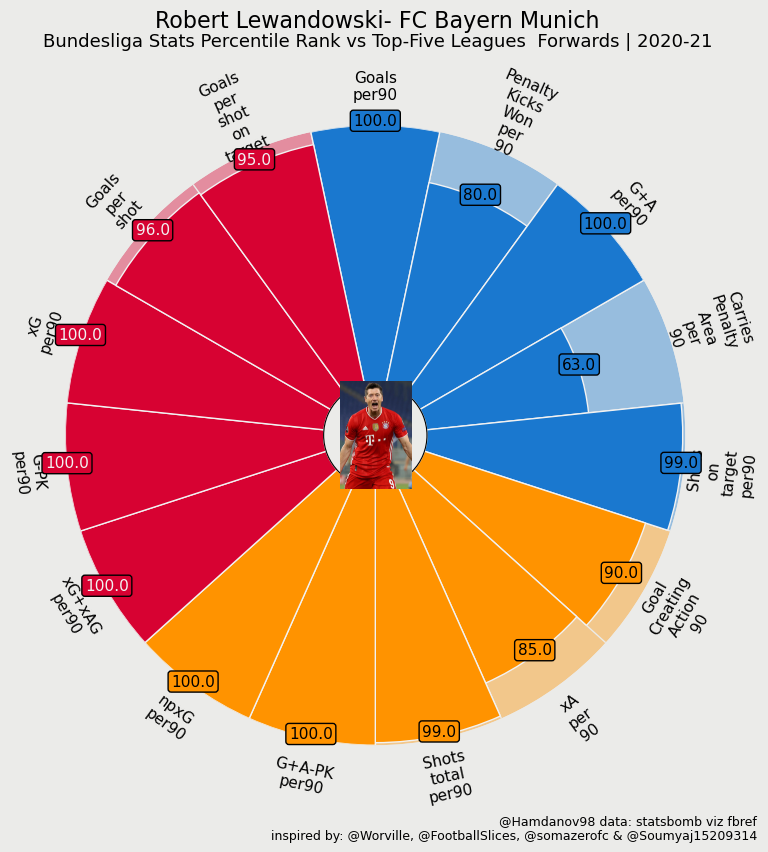

In [14]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    lewa_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Robert Lewandowski- FC Bayern Munich", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues  Forwards | 2020-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Lewa_2021_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [15]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90','Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        player_2024[feature]=-player_2024[feature]
        player_2021[feature]=-player_2024[feature]

In [16]:
Lewandowski_2021=player_2021[player_2021['Player']=='Robert Lewandowski']
Lewandowski_2021

Unnamed: 0              Player  Nation Pos          Squad           Comp  \
100      1457.0  Robert Lewandowski  pl POL  FW  Bayern Munich  de Bundesliga   

      Age    Born    MP  Starts   Min   90s  Goals_per90  G+A_per90  \
100  31.0  1988.0  29.0    28.0  2458  27.3          1.5       1.76   

     G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
100        1.21          1.46      1.14          1.31        0.88   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
100            1.06                43.0           22.0            51.2   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
100              20.0               46.5           36.34   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
100                     0.4                    1.65                   13.11   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
100                   21.87                    7.55   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
100                      36.01                       1.58   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
100                  0.81                     0.73           20.62   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
100                 115.49                                45.46   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
100                        1.87                1.03   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
100                         0.92                2.41                 1.83   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
100                   28.86                                6.78   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
100                         3.0                     0.62   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
100                   2.05                   0.04                  0.15   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
100              0.51                     0.22                   0.04   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
100                   0.44                    0.0                  0.07   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
100              0.04                     0.07                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
100             516.0             694.0               74.4          6933.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
100          1468.0             287.0             353.0               81.3   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
100              148.0              190.0                77.9   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
100             26.0             43.0              60.5             0.0   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
100        0.17       0.16          0.08               1.17   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
100               1.58                        0.88   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
100                         0.11                       2.45   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
100                    25.42                     24.4   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
100                     0.88                     0.07                  0.07   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
100             0.15            1.06                     0.0   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
100                  0.0                     0.0                

In [17]:
player_2024=player_2024[player_2024['Player']!='Robert Lewandowski']
player_2024=pd.concat([player_2024,Lewandowski_2021])
player_2024=player_2024.reset_index(drop=True)
player_2024

Unnamed: 0                     Player   Nation Pos  \
0           8.0             Matthis Abline   fr FRA  FW   
1          18.0                 Akor Adams   ng NGA  FW   
2          23.0             Elijah Adebayo  eng ENG  FW   
3          25.0              Simon Adingra   ci CIV  FW   
4          47.0            Ludovic Ajorque   fr FRA  FW   
5          80.0             Miguel Almirón   py PAR  FW   
6          97.0               Zeki Amdouni   ch SUI  FW   
7         116.0            Michail Antonio   jm JAM  FW   
8         117.0                     Antony   br BRA  FW   
9         149.0                 Iago Aspas   es ESP  FW   
10        156.0  Pierre-Emerick Aubameyang   ga GAB  FW   
11        164.0              Taiwo Awoniyi   ng NGA  FW   
12        165.0                 André Ayew   gh GHA  FW   
13        202.0            Folarin Balogun   us USA  FW   
14        204.0              Mohamed Bamba   ci CIV  FW   
15        206.0               Lameck Banda   zm ZAM  FW   
16        210.0              Léo Baptistão   br BRA  FW   
17        273.0          Wissam Ben Yedder   fr FRA  FW   
18        283.0           Domenico Berardi   it ITA  FW   
19        285.0             Álex Berenguer   es ESP  FW   
20        293.0               Isaac Bernal   es ESP  FW   
21        328.0               Jeremie Boga   ci CIV  FW   
22        339.0            Victor Boniface   ng NGA  FW   
23        347.0               Rafael Borré   co COL  FW   
24        364.0               Jarrod Bowen  eng ENG  FW   
25        365.0                 Lucas Boyé   ar ARG  FW   
26        394.0         Moritz Broschinski   de GER  FW   
27        400.0               Ante Budimir   hr CRO  FW   
28        432.0      Dominic Calvert-Lewin  eng ENG  FW   
29        441.0             Sergio Camello   es ESP  FW   
30        455.0           Francesco Caputo   it ITA  FW   
31        487.0       Valentín Castellanos   ar ARG  FW   
32        520.0             Walid Cheddira   ma MAR  FW   
33        525.0            Federico Chiesa   it ITA  FW   
34        537.0           Samuel Chukwueze   ng NGA  FW   
35        558.0            Lorenzo Colombo   it ITA  FW   
36        561.0             Kingsley Coman   fr FRA  FW   
37        628.0             Thijs Dallinga   nl NED  FW   
38        648.0             Jonathan David   ca CAN  FW   
39        664.0        Romain Del Castillo   fr FRA  FW   
40        696.0              Oumar Diakité   ci CIV  FW   
41        699.0                Assane Diao   es ESP  FW   
42        707.0                  Luis Díaz   co COL  FW   
43        765.0        Anastasios Douvikas   gr GRE  FW   
44        766.0               Artem Dovbyk   ua UKR  FW   
45        777.0             Marvin Ducksch   de GER  FW   
46        785.0                  Hugo Duro   es ESP  FW   
47        805.0               Caleb Ekuban   gh GHA  FW   
48        816.0             Emanuel Emegha   nl NED  FW   
49        818.0          Youssef En-Nesyri   ma MAR  FW   
50        856.0                 João Félix   pt POR  FW   
51        859.0              Evan Ferguson   ie IRL  FW   
52        952.0         Alejandro Garnacho   ar ARG  FW   
53        982.0             Olivier Giroud   fr FRA  FW   
54        994.0                 Maxi Gómez   uy URU  FW   
55       1008.0           Nicolás González   ar ARG  FW   
56       1011.0             Anthony Gordon  eng ENG  FW   
57       1032.0        Michael Gregoritsch   at AUT  FW   
58       1055.0             Evann Guessand   fr FRA  FW   
59       1063.0            Serhou Guirassy   gn GUI  FW   
60       1073.0             Gorka Guruzeta   es ESP  FW   
61       1080.0             Erling Haaland   no NOR  FW   
62       1085.0           Munir El Haddadi   ma MAR  FW   
63       1138.0              Son Heung-min   kr KOR  FW   
64       1148.0            Philipp Hofmann   de GER  FW   
65       1172.0             Rasmus Højlund   dk DEN  FW   
66       1180.0             Jonathan Ikone   fr FRA 

In [18]:
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [19]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [20]:
# Get Lewa's row and compute cosine similarity
lewa_2021_index = player_2024.index[player_2024['Player'] == 'Robert Lewandowski'][0]
lewa_2021_data = transformed_df.loc[lewa_2021_index].values.reshape(1, -1)

# Remove Lewa from the dataset for comparison
transformed_df = transformed_df.drop(index=lewa_2021_index)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, lewa_2021_data).flatten()
transformed_df['similarity_to_lewa_2021'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_lewa_2021', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [22]:
# Visualize the results
player_2024['similarity_to_lewa_2021'] = transformed_df['similarity_to_lewa_2021']
player_2024_sorted = player_2024.sort_values(by='similarity_to_lewa_2021', ascending=False)
player_2024_sorted

Unnamed: 0                     Player   Nation Pos  \
59       1063.0            Serhou Guirassy   gn GUI  FW   
80       1297.0                 Harry Kane  eng ENG  FW   
122      1982.0                Loïs Openda   be BEL  FW   
69       1192.0             Alexander Isak   se SWE  FW   
100      1642.0           Lautaro Martínez   ar ARG  FW   
61       1080.0             Erling Haaland   no NOR  FW   
111      1799.0              Álvaro Morata   es ESP  FW   
103      1689.0              Kylian Mbappé   fr FRA  FW   
168      2771.0              Callum Wilson  eng ENG  FW   
44        766.0               Artem Dovbyk   ua UKR  FW   
135      2228.0                Richarlison   br BRA  FW   
38        648.0             Jonathan David   ca CAN  FW   
22        339.0            Victor Boniface   ng NGA  FW   
14        204.0              Mohamed Bamba   ci CIV  FW   
130      2185.0              Gonçalo Ramos   pt POR  FW   
106      1746.0         Georges Mikautadze   ge GEO  FW   
163      2746.0              Ollie Watkins  eng ENG  FW   
142      2372.0          Gianluca Scamacca   it ITA  FW   
76       1251.0                     Joselu   es ESP  FW   
162      2724.0             Dušan Vlahović   rs SRB  FW   
10        156.0  Pierre-Emerick Aubameyang   ga GAB  FW   
71       1206.0            Nicolas Jackson   sn SEN  FW   
151      2542.0          Alexander Sørloth   no NOR  FW   
143      2377.0              Patrik Schick   cz CZE  FW   
146      2414.0             Benjamin Šeško   si SVN  FW   
53        982.0             Olivier Giroud   fr FRA  FW   
139      2315.0              Mohamed Salah   eg EGY  FW   
120      1925.0               Darwin Núñez   uy URU  FW   
123      1998.0             Victor Osimhen   ng NGA  FW   
78       1264.0            Vinicius Júnior   br BRA  FW   
118      1906.0             Justin Njinmah   de GER  FW   
172      2784.0                 Chris Wood   nz NZL  FW   
43        765.0        Anastasios Douvikas   gr GRE  FW   
60       1073.0             Gorka Guruzeta   es ESP  FW   
77       1252.0                 Diogo Jota   pt POR  FW   
159      2612.0              Ferrán Torres   es ESP  FW   
87       1411.0        Alexandre Lacazette   fr FRA  FW   
17        273.0          Wissam Ben Yedder   fr FRA  FW   
55       1008.0           Nicolás González   ar ARG  FW   
13        202.0            Folarin Balogun   us USA  FW   
72       1223.0         Luis Javier Suárez   co COL  FW   
37        628.0             Thijs Dallinga   nl NED  FW   
20        293.0               Isaac Bernal   es ESP  FW   
27        400.0               Ante Budimir   hr CRO  FW   
50        856.0                 João Félix   pt POR  FW   
63       1138.0              Son Heung-min   kr KOR  FW   
115      1833.0              Rodrigo Muniz   br BRA  FW   
147      2469.0            Dominic Solanke  eng ENG  FW   
101      1658.0       Jean-Philippe Mateta   fr FRA  FW   
11        164.0              Taiwo Awoniyi   ng NGA  FW   
107      1749.0            Arkadiusz Milik   pl POL  FW   
24        364.0               Jarrod Bowen  eng ENG  FW   
194       130.0                  Elye Wahi   fr FRA  FW   
155      2589.0              Marcus Thuram   fr FRA  FW   
193       128.0                    Vitinha   pt POR  FW   
187        87.0                Neal Maupay   fr FRA  FW   
57       1032.0        Michael Gregoritsch   at AUT  FW   
140      2345.0                 Leroy Sané   de GER  FW   
149      2515.0       Jørgen Strand Larsen   no NOR  FW   
186        70.0          Randal Kolo Muani   fr FRA  FW   
102      1679.0              Borja Mayoral   es ESP  FW   
2          23.0             Elijah Adebayo  eng ENG  FW   
49        818.0          Youssef En-Nesyri   ma MAR  FW   
136      2261.0                    Rodrygo   br BRA  FW   
138      2312.0                Bukayo Saka  eng ENG  FW   
184        48.0            Niclas Füllkrug   de GER  FW   
189        97.0           Samuel Omorodion   es ESP 

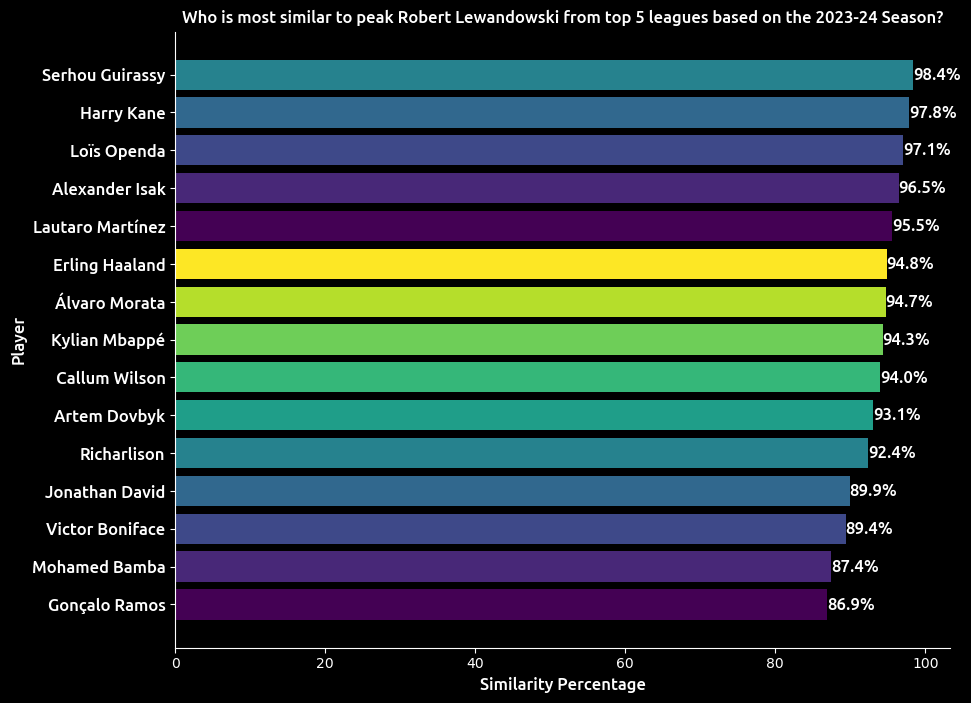

In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_deligt_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_lewa_2021', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_lewa_2021'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to peak Robert Lewandowski from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [24]:
David=player_2024[player_2024['Player']=='Jonathan David']
David

Unnamed: 0          Player  Nation Pos  Squad        Comp  Age    Born  \
38       648.0  Jonathan David  ca CAN  FW  Lille  fr Ligue 1  0.0  2000.0   

      MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
38  34.0    30.0  2629  29.2         0.65       0.79        0.58   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
38          0.72       0.6          0.71        0.51            0.63   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
38                39.0           15.0            38.5              19.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
38               48.7            31.1                    0.21   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
38                    2.05                   15.55                   13.84   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
38                    4.38                      30.99   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
38                       1.34                  0.51                     0.65   

    Carries_per_90  Total_Distance_per_90  \
38           24.38                 129.42   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
38                                51.16                        1.61   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
38                1.13                         0.75               -1.88   

    Dispossessed_per_90  Passes_Received_per_90  \
38                -1.51                   23.73   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
38                                6.78                        2.64   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
38                     0.31                   1.99                   0.03   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
38                   0.1              0.31                     0.21   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
38                    0.0                    0.1                    0.0   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
38                  0.03               0.1                     0.07   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
38                    0.0             537.0             655.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
38               82.0          7433.0          1592.0             306.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
38             359.0               85.2              186.0              219.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
38                84.9             12.0             15.0              80.0   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
38            0.14        0.11       0.08          0.02                1.1   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
38               1.82                        0.89   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
38                         0.03                       2.71   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
38                    22.43                    20.89                     1.37   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
38                     0.07                   0.0              0.0   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
38            0.07                     0.0                  0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
38                     0.0                      0.0                      0.0   

    Passes_Cmp_per_90  Passes_Off_per_

In [25]:
params = [
    'Goals_per90', 
    'Penalty_Kicks_Won_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Shots_total_per90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'xG+xAG_per90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Guruzeta's stats from the percentile ranks DataFrame
david_percentile_ranks = round(players_percentile_ranks.iloc[[38]],0)

# Print the percentile ranks for Guruzeta
print(david_percentile_ranks)

    Goals_per90  Penalty_Kicks_Won_per_90  G+A_per90  \
38         88.0                      82.0       84.0   

    Carries_Penalty_Area_per_90  Shots_on_target_per90  \
38                         42.0                   87.0   

    Goal_Creating_Action_90  xA_per_90  Shots_total_per90  G+A-PK_per90  \
38                     48.0       42.0               52.0          84.0   

    npxG_per90  xG+xAG_per90  G-PK_per90  xG_per90  Goals_per_shot  \
38        86.0          84.0        88.0      88.0            91.0   

    Goals_per_shot_on_target  
38                      68.0  


In [26]:
david_percentile_ranks_list = david_percentile_ranks.values.flatten().tolist()

david_percentile_ranks_list

[88.0,
 82.0,
 84.0,
 42.0,
 87.0,
 48.0,
 42.0,
 52.0,
 84.0,
 86.0,
 84.0,
 88.0,
 88.0,
 91.0,
 68.0]

In [27]:
image_path = "david.jpeg"
fdj_cropped = Image.open(image_path)


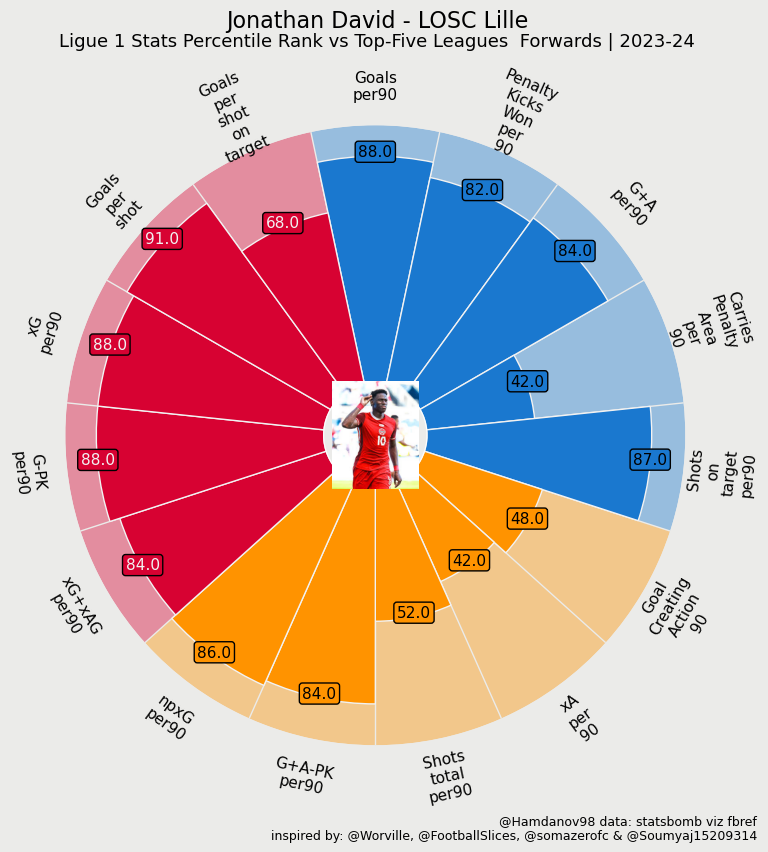

In [28]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    david_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Jonathan David - LOSC Lille", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues  Forwards | 2023-24",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('David_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [29]:
Bamba=player_2024[player_2024['Player']=='Mohamed Bamba']
Bamba

Unnamed: 0         Player  Nation Pos    Squad        Comp  Age    Born  \
14       204.0  Mohamed Bamba  ci CIV  FW  Lorient  fr Ligue 1  0.0  2001.0   

      MP  Starts   Min   90s  Goals_per90  G+A_per90  G-PK_per90  \
14  16.0    14.0  1138  12.6         0.63       0.87        0.55   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
14          0.79      0.51          0.67        0.44            0.61   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
14                29.0           11.0            37.9              17.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
14               58.6           32.14                    0.71   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
14                    2.54                   15.48                   14.84   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
14                    6.03                      32.06   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
14                        2.3                  0.87                     1.35   

    Carries_per_90  Total_Distance_per_90  \
14           22.06                 132.94   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
14                                60.48                        1.98   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
14                1.75                         1.03               -2.46   

    Dispossessed_per_90  Passes_Received_per_90  \
14                -1.98                    22.3   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
14                                5.48                        2.53   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
14                     0.24                    1.9                    0.0   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
14                  0.24              0.16                     0.16   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
14                   0.08                   0.24                    0.0   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
14                   0.0               0.0                      0.0   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
14                    0.0             185.0             256.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
14               72.3          2456.0           373.0              96.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
14             129.0               74.4               69.0               88.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
14                78.4              3.0              4.0              75.0   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
14            0.24        0.17        0.1          0.07               1.11   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
14               0.63                        0.79   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
14                          0.0                       1.27   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
14                    20.32                     18.1                     1.98   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
14                      0.0                   0.0              0.0   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
14            0.16                    0.08                  0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
14                     0.0                      0.0                      0.0   

    Passes_Cmp_per_90  Passes_Off_pe

In [30]:
params = [
    'Goals_per90', 
    'Penalty_Kicks_Won_per_90', 
    'G+A_per90', 
    'Carries_Penalty_Area_per_90', 
    'Shots_on_target_per90', 
    'Goal_Creating_Action_90', 
    'xA_per_90', 
    'Shots_total_per90', 
    'G+A-PK_per90', 
    'npxG_per90', 
    'xG+xAG_per90', 
    'G-PK_per90', 
    'xG_per90', 
    'Goals_per_shot', 
    'Goals_per_shot_on_target'
]

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Guruzeta's stats from the percentile ranks DataFrame
bamba_percentile_ranks = round(players_percentile_ranks.iloc[[14]],0)

# Print the percentile ranks for Guruzeta
print(bamba_percentile_ranks)

    Goals_per90  Penalty_Kicks_Won_per_90  G+A_per90  \
14         86.0                      29.0       89.0   

    Carries_Penalty_Area_per_90  Shots_on_target_per90  \
14                         64.0                   82.0   

    Goal_Creating_Action_90  xA_per_90  Shots_total_per90  G+A-PK_per90  \
14                     31.0       53.0               69.0          89.0   

    npxG_per90  xG+xAG_per90  G-PK_per90  xG_per90  Goals_per_shot  \
14        74.0          79.0        86.0      82.0            83.0   

    Goals_per_shot_on_target  
14                      71.0  


In [31]:
bamba_percentile_ranks_list = bamba_percentile_ranks.values.flatten().tolist()

bamba_percentile_ranks_list

[86.0,
 29.0,
 89.0,
 64.0,
 82.0,
 31.0,
 53.0,
 69.0,
 89.0,
 74.0,
 79.0,
 86.0,
 82.0,
 83.0,
 71.0]

In [32]:
image_path = "Bamba.jpeg"
fdj_cropped = Image.open(image_path)


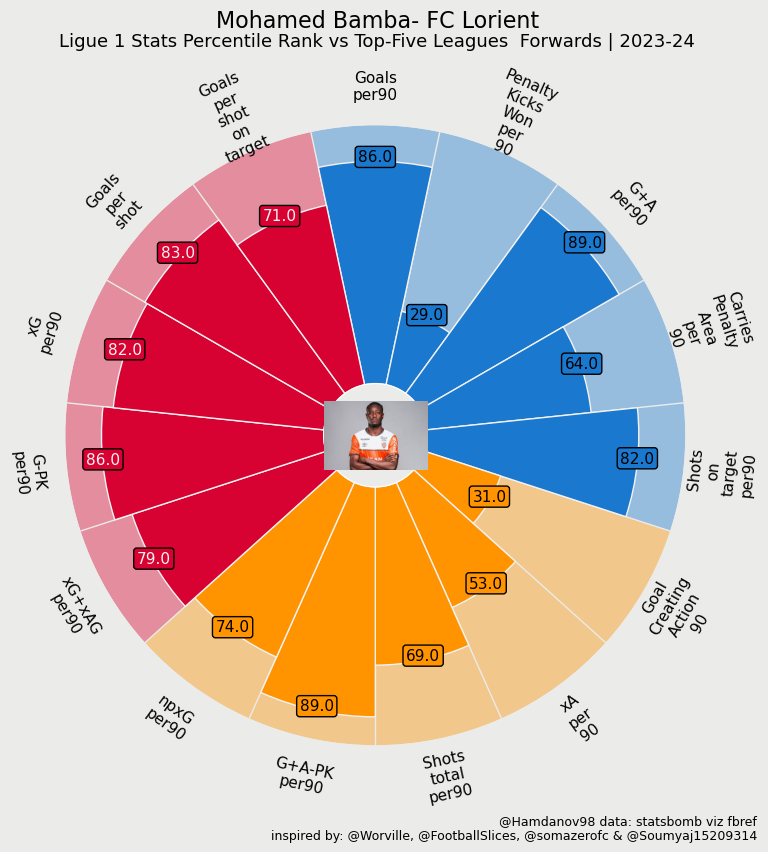

In [33]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    bamba_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Mohamed Bamba- FC Lorient", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues  Forwards | 2023-24",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Bamba_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png
